# INTRODUCTION

**For our final project we wanted to choose an aspect of neighborhoods that we all saw as very important, so we decided on doing overall quality. Overall quality is hugely important to a neighborhood because no one wants to live in a low quality area. We decided that the best way to tackle this was for each of us to choose a completely different aspect of a neighborhood, and then combine our findings to keep things as general as possible. The aspects we ended up choosing were safety, greenery, and road quality. Safety is being gauged by how much crime a neighborhood has, greenery is being gauged by how many trees, and road quality is being gauged by how many reports there are about miscellaneous road problems.**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import geopandas as gpd
data = pd.read_csv("https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4")
data.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT


**This data shows a lot of information but I will really only be focusing on location and status.**

In [2]:
dataF = data[data['STATUS'] != 1]
dataF.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
8,179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
12,182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
13,184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
15,185902.0,2017-09-11T13:49:00,Parks Trails,Call Center,0,DPW - Park Maintenance,NaN,6.0,1.0,4.200302e+10,NaN,1.0,NaN,1-4,-80.005966,40.438043,EXACT
22,167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
27,170189.0,2017-07-14T15:37:00,Mayor's Office,Call Center,0,311,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,2-23,-79.948119,40.455066,APPROXIMATE
33,147753.0,2017-04-24T14:42:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,-80.012632,40.455277,APPROXIMATE
34,133416.0,2017-02-22T12:12:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Spring Hill-City View,1.0,26.0,4.200326e+10,1.0,26.0,1.0,1-11,-79.998422,40.470484,APPROXIMATE
35,136289.0,2017-03-03T10:34:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.984233,40.462590,APPROXIMATE
36,138513.0,2017-03-09T13:12:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Manchester,6.0,21.0,4.200321e+10,1.0,21.0,1.0,1-8,-80.023816,40.453369,APPROXIMATE


**The first thing we need to do is get rid of all of the non-active reports which we do by filtering out all rows with a value of 1 in the status row.**

# Quanitity of Reports

<BarContainer object of 23 artists>

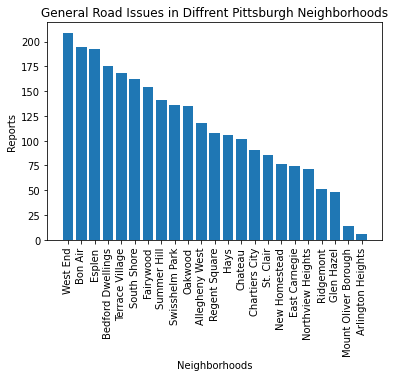

In [3]:
totals = dict()

totals = dataF['NEIGHBORHOOD'].value_counts()
descending_totals = dict( sorted(totals.items(), key=operator.itemgetter(1),reverse=True))

da = dict(list(descending_totals.items())[len(descending_totals)//2:])
db = dict(list(descending_totals.items())[:len(descending_totals)//2])

d1 = dict(list(da.items())[len(da)//2:])
d2 = dict(list(da.items())[:len(da)//2])
d3 = dict(list(db.items())[len(db)//2:])
d4 = dict(list(db.items())[:len(db)//2])

keys = d1.keys()
values = d1.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

<BarContainer object of 23 artists>

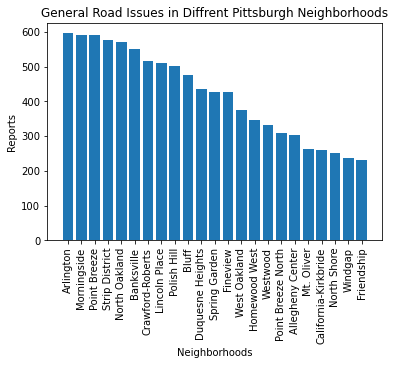

In [4]:
keys = d2.keys()
values = d2.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

<BarContainer object of 23 artists>

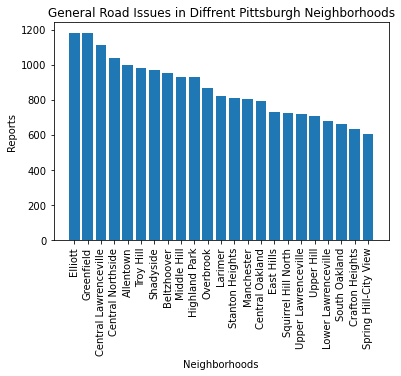

In [5]:
keys = d3.keys()
values = d3.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

<BarContainer object of 22 artists>

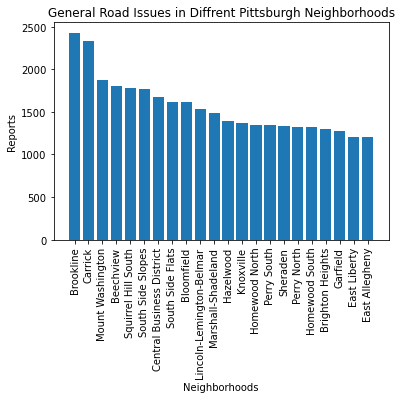

In [6]:
keys = d4.keys()
values = d4.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

**Because of the tons of neighborhoods there are in Pittsburgh, I needed to break the result down into 4 bar graphs. The top graph shows the neighborhoods with the least general road issues, while the bottom graph shows the neighborhoods with the most. So although West End has the most general road issues in the first bar chart, it is still in the bottom 25%.**

# Final Thoughts on Road Quality Data

In [7]:
print("The neighborhood with most reports is Brookline with:", descending_totals['Brookline'])
print("The neighborhood with least reports is Arlington Heights with:",descending_totals['Arlington Heights'])

The neighborhood with most reports is Brookline with: 2430
The neighborhood with least reports is Arlington Heights with: 6


**So, in terms of quality of roads alone, Brookline is the worst neighborhood and Arlington Heights is the best. Brookline doesn't even rank in the top 20 neighborhoods in terms of population so it isn't just because there are more people using the roads and reporting problems. The same goes with Arlinton too. Arlington has 20th least population, but there are neighborhoods with more less people with many more reports.**

# Author: Dylan Minnick

# Arrest Data

In [23]:
#Author: Dylan Minnick
import pandas as pd
#arrests = pd.read_csv("arrests.csv")
arrest_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

arrest_data.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


**A look at Pittsburgh's arrests by neighborhood**

In [24]:
incidents = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts(ascending= True).rename_axis('Neighborhood').reset_index(name='Arrests')
print(incidents)

                 Neighborhood  Arrests
0     Mt. Oliver Neighborhood        2
1      Troy Hill-Herrs Island        6
2             Mt. Oliver Boro       16
3               Regent Square       22
4           Central Northside       23
..                        ...      ...
93             Homewood South     1460
94             East Allegheny     1518
95                    Carrick     1623
96           South Side Flats     2315
97  Central Business District     2729

[98 rows x 2 columns]


Text(0, 0.5, 'Arrests')

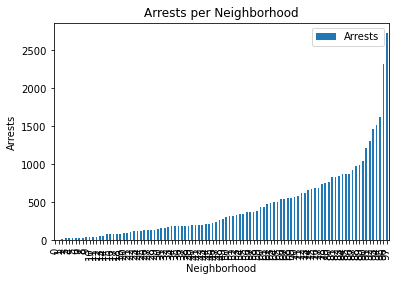

In [3]:
ax= incidents.plot(kind= "bar", title= "Arrests per Neighborhood")

ax.set_xlabel("Neighborhood")
ax.set_ylabel("Arrests")

**Let's narrow in on the ten neighborhoods with the highest amount of arrests.**

In [4]:
top_ten= incidents[:10]
print(top_ten)

              Neighborhood  Arrests
0  Mt. Oliver Neighborhood        2
1   Troy Hill-Herrs Island        6
2          Mt. Oliver Boro       16
3            Regent Square       22
4        Central Northside       23
5                Ridgemont       25
6            New Homestead       26
7           Swisshelm Park       27
8           Chartiers City       28
9                St. Clair       35


Text(0, 0.5, 'Arrests')

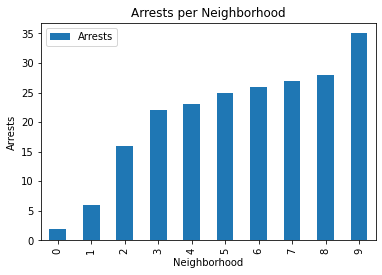

In [5]:
ax= top_ten.plot(kind= "bar", title= "Arrests per Neighborhood")

ax.set_xlabel("Neighborhood")
ax.set_ylabel("Arrests")

**Now Let's Look at our Next Metric Factor**
# Tree Data

In [12]:
tree_data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", index_col="id", low_memory=False)
tree_data.head(10)

,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,16.0,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,22.0,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,6.0,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,7.0,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,38.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,21.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,2.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,13.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,18.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161


In [13]:
count_dict = {}
for index, row in tree_data.iterrows():
    key = row['neighborhood']
    if key in count_dict:
        count_dict[key] += 1
    else: count_dict[key] = 1
        
rankings = list(count_dict.items())
rankings.sort(key = lambda x:x[1], reverse = True)
print(rankings)

[('Squirrel Hill South', 5073), ('Highland Park', 2941), ('Squirrel Hill North', 2083), ('South Side Flats', 1693), ('Shadyside', 1558), ('Bloomfield', 1436), ('East Liberty', 1366), ('Point Breeze', 1316), ('Perry North', 1007), ('Central Business District', 1002), ('Brighton Heights', 910), ('Mount Washington', 874), ('Allegheny Center', 867), ('Brookline', 853), ('North Oakland', 775), ('Carrick', 772), ('Greenfield', 745), ('Central Lawrenceville', 713), ('Manchester', 707), ('Stanton Heights', 700), ('Central Northside', 674), ('Hazelwood', 652), ('Garfield', 626), ('Beechview', 611), ('Crawford-Roberts', 568), ('Point Breeze North', 566), ('Lincoln-Lemington-Belmar', 525), ('Lower Lawrenceville', 508), ('Marshall-Shadeland', 488), ('Strip District', 486), ('East Hills', 483), ('Morningside', 461), ('Homewood South', 459), ('North Shore', 457), ('Banksville', 437), ('Regent Square', 434), ('Knoxville', 432), ('Homewood North', 403), ('Sheraden', 392), ('East Allegheny', 391), ('Al

In [14]:
print("TOP 10:")
for item in rankings[0:10]:
    print(item)

TOP 10:
('Squirrel Hill South', 5073)
('Highland Park', 2941)
('Squirrel Hill North', 2083)
('South Side Flats', 1693)
('Shadyside', 1558)
('Bloomfield', 1436)
('East Liberty', 1366)
('Point Breeze', 1316)
('Perry North', 1007)
('Central Business District', 1002)


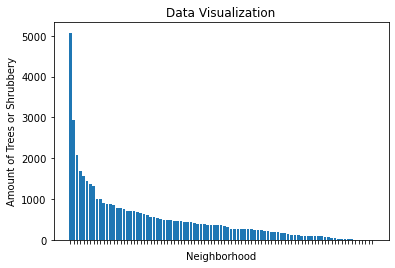

In [15]:
import matplotlib.pyplot as plt

data = [x[1] for x in rankings]
labels = []
#labels = [x[0] for x in rankings]
plt.xticks(range(len(data)), labels)
plt.xlabel('Neighborhood')
plt.ylabel('Amount of Trees or Shrubbery')
plt.title('Data Visualization')
plt.bar(range(len(data)), data) 
plt.show()

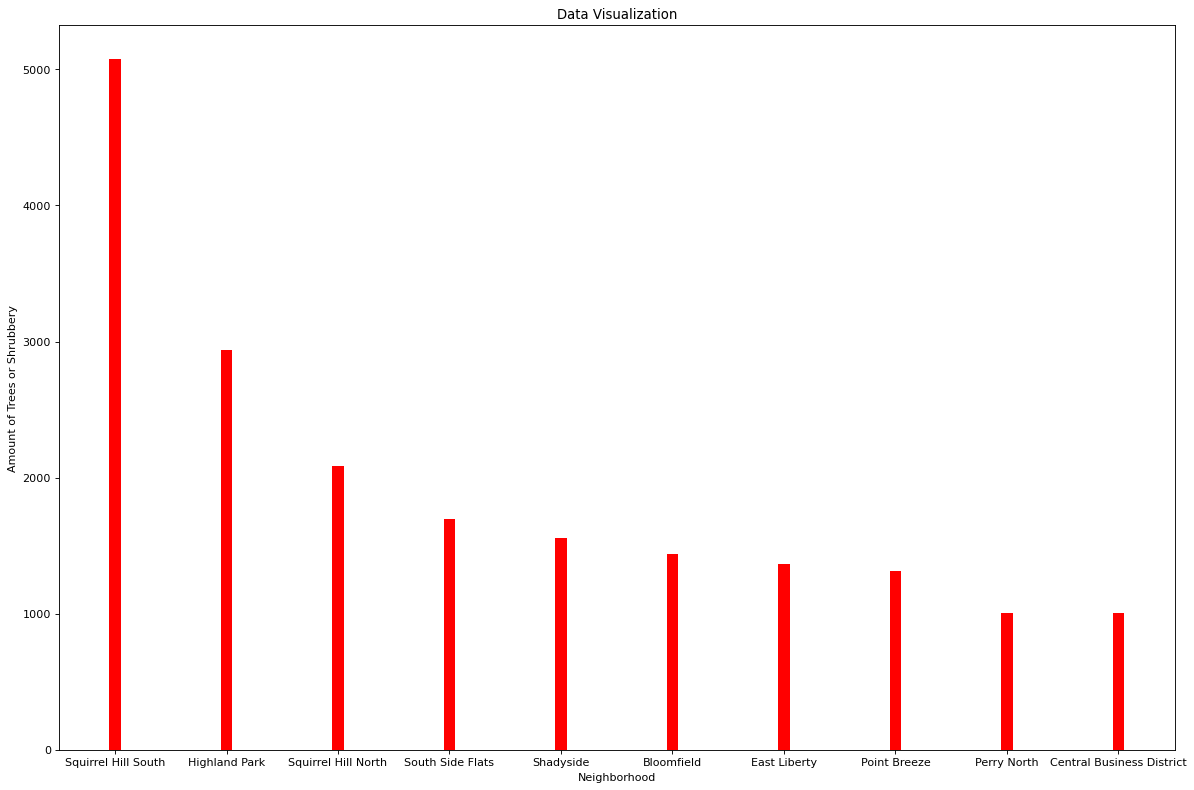

In [17]:
data = [rankings[i][1] for i in range(0, len(rankings[0:10]))]
labels = [rankings[i][0] for i in range(0, len(rankings[0:10]))]
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(range(len(data)), labels)
plt.xlabel('Neighborhood')
plt.ylabel('Amount of Trees or Shrubbery')
plt.title('Data Visualization')
plt.bar(range(len(data)), data, width = 0.1, color = 'r') 
width = 0.8
plt.show()
#labels = [x[0] for x in rankings[0:10]]
#print(labels)

**Based on the dataset, and analysis of the number of trees and general greenery in the neighborhoods of Pittsburgh, the abovementioned ten neighborhoods have the most greenery, so by this metric, these ten neighborhoods are the best neighborhoods to live in in Pittsburgh.**

# Calculating Final Metric

In [25]:
count_dict_arrests = {}
for index, row in incidents.iterrows():
    key = row['Neighborhood']
    if key in count_dict_arrests:
        count_dict_arrests[key] += row['Arrests']
    else: count_dict_arrests[key] = row['Arrests']
        
rankingsArrest = list(count_dict_arrests.items())
rankingsArrest.sort(key = lambda x:x[1], reverse = False)
print(rankingsArrest)

[('Mt. Oliver Neighborhood', 2), ('Troy Hill-Herrs Island', 6), ('Mt. Oliver Boro', 16), ('Regent Square', 22), ('Central Northside', 23), ('Ridgemont', 25), ('New Homestead', 26), ('Swisshelm Park', 27), ('Chartiers City', 28), ('St. Clair', 35), ('East Carnegie', 36), ('Outside County', 41), ('Outside State', 45), ('Oakwood', 54), ('Summer Hill', 58), ('Fairywood', 74), ('Hays', 75), ('Windgap', 76), ('Golden Triangle/Civic Arena', 83), ('Allegheny West', 86), ('Glen Hazel', 91), ('Mount Oliver', 96), ('Arlington Heights', 109), ('Polish Hill', 114), ('Esplen', 121), ('Friendship', 122), ('Duquesne Heights', 128), ('Lincoln Place', 129), ('Morningside', 137), ('Upper Lawrenceville', 138), ('Westwood', 150), ('Bon Air', 157), ('Stanton Heights', 160), ('Spring Garden', 176), ('Point Breeze North', 179), ('Terrace Village', 179), ('Lower Lawrenceville', 182), ('Banksville', 186), ('Squirrel Hill North', 186), ('West End', 190), ('California-Kirkbride', 197), ('Overbrook', 198), ('South

In [26]:
totals = dict()

totals = dataF['NEIGHBORHOOD'].value_counts()
descending_totals = dict( sorted(totals.items(), key=operator.itemgetter(1),reverse=True))
print(descending_totals)

{'Brookline': 2430, 'Carrick': 2336, 'Mount Washington': 1877, 'Beechview': 1803, 'Squirrel Hill South': 1784, 'South Side Slopes': 1767, 'Central Business District': 1679, 'South Side Flats': 1620, 'Bloomfield': 1616, 'Lincoln-Lemington-Belmar': 1533, 'Marshall-Shadeland': 1488, 'Hazelwood': 1396, 'Knoxville': 1367, 'Homewood North': 1351, 'Perry South': 1343, 'Sheraden': 1337, 'Perry North': 1327, 'Homewood South': 1325, 'Brighton Heights': 1294, 'Garfield': 1279, 'East Liberty': 1210, 'East Allegheny': 1209, 'Elliott': 1181, 'Greenfield': 1178, 'Central Lawrenceville': 1109, 'Central Northside': 1038, 'Allentown': 999, 'Troy Hill': 982, 'Shadyside': 968, 'Beltzhoover': 953, 'Middle Hill': 929, 'Highland Park': 927, 'Overbrook': 867, 'Larimer': 823, 'Stanton Heights': 807, 'Manchester': 801, 'Central Oakland': 791, 'East Hills': 727, 'Squirrel Hill North': 725, 'Upper Lawrenceville': 717, 'Upper Hill': 705, 'Lower Lawrenceville': 677, 'South Oakland': 662, 'Crafton Heights': 630, 'Sp

In [34]:
# rankings : Trees
# rankingsArrest : Arrests
# rankingsX : TBD
KeySet = set()
#
for key in count_dict:
    if pd.notna(key):
        KeySet.add(key)
for key in count_dict_arrests:
    if pd.notna(key):
        KeySet.add(key)
for key in descending_totals:
    if pd.notna(key):
        KeySet.add(key)
#print(KeySet)

FinalRanks = []
for neighborhood in KeySet:
    trees, arrests, traffic_incidents = 0, 0, 0
    if neighborhood in count_dict:
        trees = count_dict[neighborhood]
    if neighborhood in count_dict_arrests:
        arrests = count_dict_arrests[neighborhood]
    if neighborhood in descending_totals:
        traffic_incidents = descending_totals[neighborhood]
    
    FinalRanks.append([neighborhood, (0.25 * trees) - (0.75 *arrests) - (0.25 * traffic_incidents)])

FinalRanks.sort(key = lambda x:x[1], reverse = True)
print(FinalRanks)

[['Squirrel Hill South', 405.25], ['Highland Park', 218.5], ['Squirrel Hill North', 200.0], ['Regent Square', 65.0], ['New Homestead', 7.25], ['Swisshelm Park', 7.0], ['Point Breeze', 3.0], ['Allegheny West', 2.5], ['Mt. Oliver Neighborhood', -1.5], ['Mount Oliver Borough', -3.5], ['Troy Hill-Herrs Island', -4.5], ['Mt. Oliver Boro', -12.0], ['Ridgemont', -23.75], ['Outside County', -30.75], ['Outside State', -33.75], ['Chartiers City', -34.5], ['East Carnegie', -43.5], ['St. Clair', -44.75], ['Oakwood', -51.25], ['Summer Hill', -59.0], ['Friendship', -59.0], ['Golden Triangle/Civic Arena', -62.25], ['Mt. Oliver', -62.5], ['Point Breeze North', -70.0], ['Mount Oliver', -72.0], ['Glen Hazel', -79.75], ['Arlington Heights', -82.0], ['Hays', -82.5], ['Fairywood', -86.25], ['Windgap', -86.75], ['Central Northside', -108.25], ['Terrace Village', -111.0], ['Westwood', -130.5], ['Morningside', -135.25], ['Esplen', -138.25], ['Bon Air', -143.5], ['Polish Hill', -143.5], ['Stanton Heights', -14

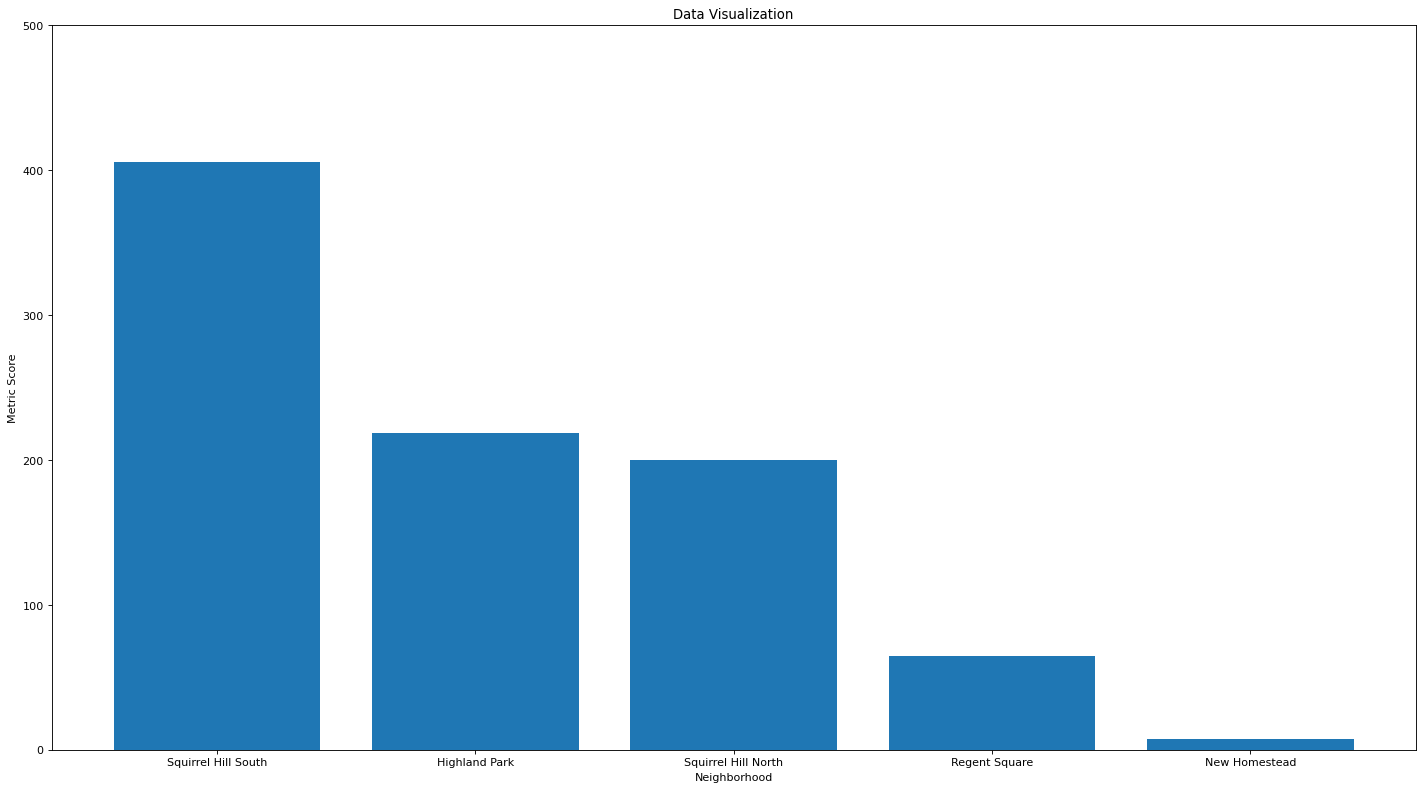

In [45]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(22, 12), dpi=80, facecolor='w', edgecolor='k')
TOP_X = 5
data = [x[1] for x in FinalRanks[0:TOP_X]]
#labels = []
labels = [x[0] for x in FinalRanks[0:TOP_X]]
axes = plt.gca()
axes.set_ylim([0,500])
plt.xticks(range(len(FinalRanks[0:TOP_X])), labels)
plt.xlabel('Neighborhood')
plt.ylabel('Metric Score')
plt.title('Data Visualization')
plt.bar(range(len(FinalRanks[0:TOP_X])), data) 
plt.show()

# Conclusion
**Since there are usually lots more trees in a neighborhood than arrests, it is more useful to give arrests a larger proportion of weightage than the number of trees when considering our overall metric. Thus, arrests are weighted 3x as much as the equivalent presence of a tree or traffic incident.**

**Then, the final metric is a combination of the three factors with:**
1. Arrests (Crime), Weighted **3x**
2. Trees (Greenery), Weighted **1x**
3. Road Quality (Infrastructure/Traffic), Weighted **1x**

**Our conclusion is that the following are the ten best neighbhorhoods in Pittsburgh:**

In [46]:
i = 1
for x in FinalRanks[0:10]:
    print('#' + str(i) + " " + x[0])
    i += 1

#1 Squirrel Hill South
#2 Highland Park
#3 Squirrel Hill North
#4 Regent Square
#5 New Homestead
#6 Swisshelm Park
#7 Point Breeze
#8 Allegheny West
#9 Mt. Oliver Neighborhood
#10 Mount Oliver Borough
